Saving auto-mpg.csv to auto-mpg.csv
----- POLYNOMIAL REGRESSION RESULTS -----

Degree 2
MSE: 18.41696779601779
RMSE: 4.291499481069267
R² Score: 0.6391701147013311


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


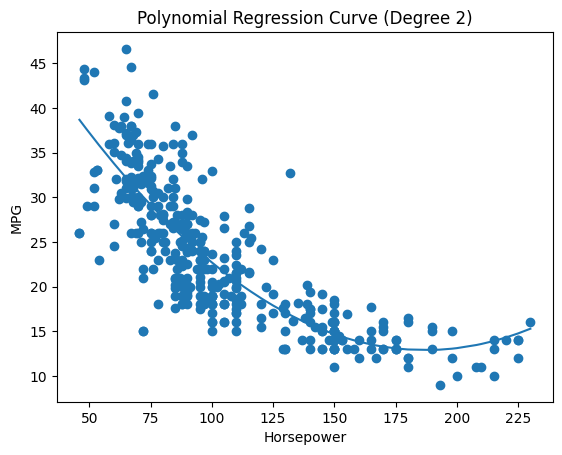


Degree 3
MSE: 18.460267222224626
RMSE: 4.296541309265469
R² Score: 0.6383217814053861


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


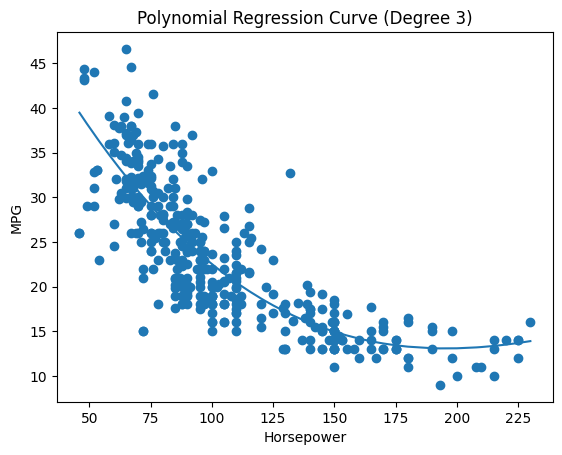


Degree 4
MSE: 18.268226874853184
RMSE: 4.274134634619409
R² Score: 0.6420842844016577


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


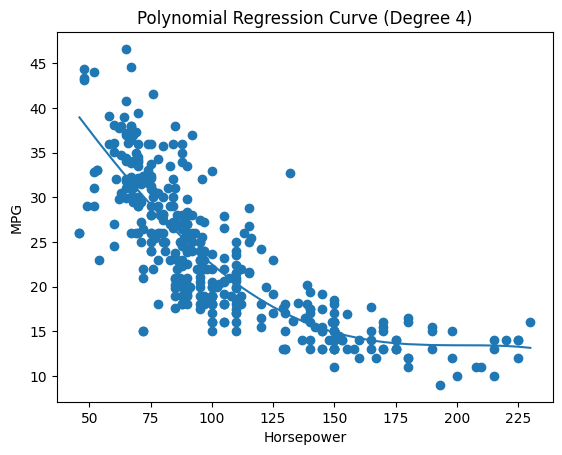


----- RIDGE REGRESSION (Degree 4) -----


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


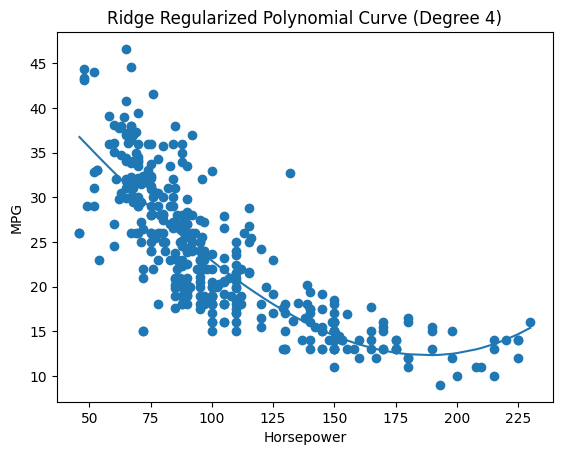

In [2]:
# Roll No: 24BAD084
# Name: Noorin Nashika M
# Scenario 2 - Polynomial Regression

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv("auto-mpg.csv")

# Replace missing values
data.replace("?", np.nan, inplace=True)
data["horsepower"] = data["horsepower"].astype(float)
data.dropna(inplace=True)

# Select Feature and Target
X = data[["horsepower"]]
y = data["mpg"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]

print("----- POLYNOMIAL REGRESSION RESULTS -----")

for d in degrees:

    # Generate Polynomial Features
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Feature Scaling
    scaler = StandardScaler()
    X_poly_train = scaler.fit_transform(X_poly_train)
    X_poly_test = scaler.transform(X_poly_test)

    # Train Model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Prediction
    y_pred = model.predict(X_poly_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\nDegree {d}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R² Score:", r2)

    # Plot Curve
    X_sorted = np.sort(X.values, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    X_poly_sorted = scaler.transform(X_poly_sorted)
    y_curve = model.predict(X_poly_sorted)

    plt.figure()
    plt.scatter(X, y)
    plt.plot(X_sorted, y_curve)
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.title(f"Polynomial Regression Curve (Degree {d})")
    plt.show()

# -------------------------------
# Ridge Regularization (Degree 4)
# -------------------------------

print("\n----- RIDGE REGRESSION (Degree 4) -----")

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

# Prediction Curve
X_sorted = np.sort(X.values, axis=0)
X_poly_sorted = poly.transform(X_sorted)
X_poly_sorted = scaler.transform(X_poly_sorted)
y_curve = ridge.predict(X_poly_sorted)

plt.figure()
plt.scatter(X, y)
plt.plot(X_sorted, y_curve)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Ridge Regularized Polynomial Curve (Degree 4)")
plt.show()
